In [1]:
# Only modify these two variables
batch = "batch_0000_0001/"
raterName = "Jenna Schabdach"

Rating view 0 for sub-HM92GRMCZ9_ses-3369age01443 of 30 total scan sessions


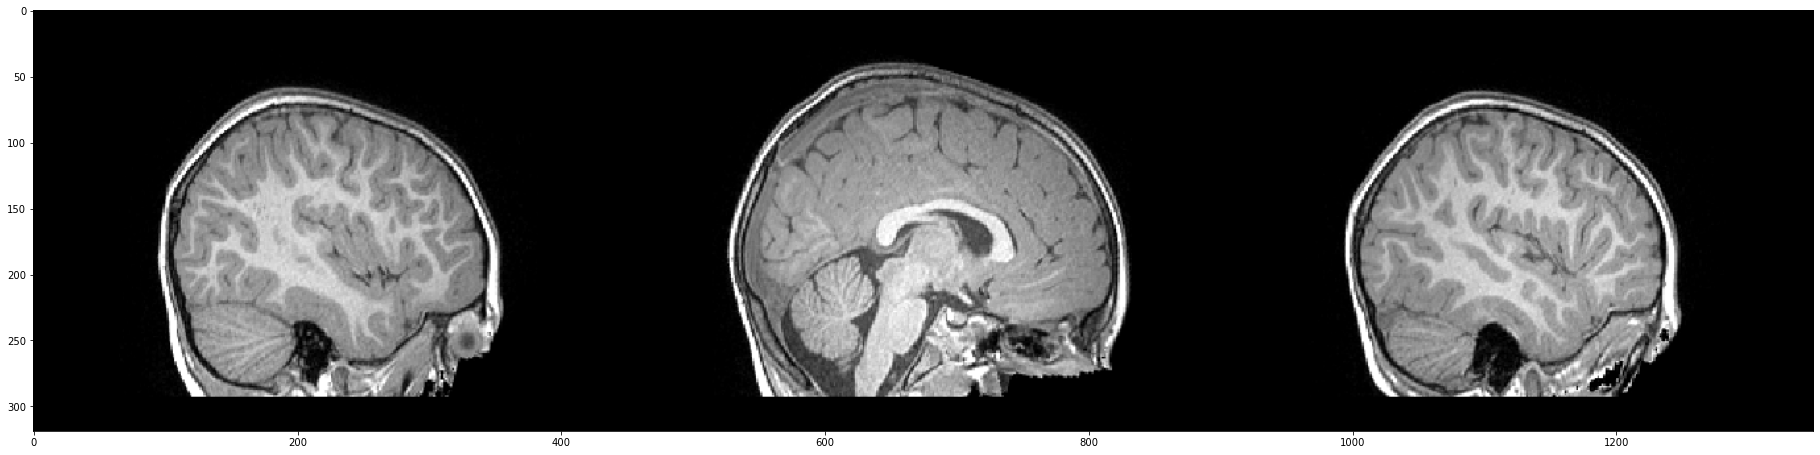

KeyboardInterrupt: Interrupted by user

In [2]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Set up the batch data frame
# baseDir = "/home/drjennay/image_qc_pngs"
baseDir = "/Users/youngjm/Data/clip/images/qc/mpr_fs_6.0.0/"
ratingDfFn = os.path.join(baseDir, "test_ratings.csv")

# List the file names
fns = os.listdir(os.path.join(baseDir, batch))
subjSesIds = list(set([i.split("_dim")[0] for i in fns]))


if os.path.exists(ratingDfFn):
    ratingDf = pd.read_csv(ratingDfFn)
else:
    setup = {"batch": [batch for i in range(len(fns))],
            "png_filename": fns, 
            "subject": [i.split("_")[0] for i in fns], 
            "session": [i.split("_")[1] for i in fns],  
            "rater": [raterName for i in range(len(fns))], 
            "rater_grades": ["" for i in range(len(fns))]}
    ratingDf = pd.DataFrame(setup)


scanRatingCounter = 1
# for each subject
for scan in subjSesIds:
    # Get the filenames
    subjFns = [i for i in fns if scan in i]
    # for each of the 3 dimensions
    for dim in range(3):
        # display progress
        print("Rating view " + str(dim) + " for " + scan + " of " + str(len(subjSesIds)) + " total scan sessions")
        # load all 3 pngs
        dimFns = sorted([i for i in subjFns if "dim"+str(dim) in i])
        img0 = plt.imread(os.path.join(os.path.join(baseDir, batch), dimFns[0]))
        img1 = plt.imread(os.path.join(os.path.join(baseDir, batch), dimFns[1]))
        img2 = plt.imread(os.path.join(os.path.join(baseDir, batch), dimFns[2]))
        dimImg = np.concatenate([img0, img1, img2], axis=1)
        figsize = (len(dimImg)/10, len(dimImg[0])/20)
        # display the png
        plt.figure(figsize=figsize)
        plt.imshow(dimImg)
        plt.show()
#     # for each png in the scan
#     for fn in subjFns:
#         # display progress
#         print("Rating scan "+str(scanRatingCounter)+" of "+str(len(fns)))
#         # display the file name
#         print("Filename:", fn)
#         # load the png
#         f = os.path.join(os.path.join(baseDir, batch), fn)
#         img = plt.imread(f)
#         imsize = (len(img)/20, len(img[0])/20)
#         print(imsize)
#         # display the png
#         plt.figure(figsize=imsize)
#         plt.imshow(img)
#         plt.show()
        
        # ask for a rating
        rating = ""
        while rating not in [0, 1, 2, -1]:
            rating = int(input("Grade the image on a scale of 0/1/2/-1 (aka poor quality/not sure/good quality/not a precontrast brain image): "))
            
        # add the rating to the dataframe
        ratingDf.loc[ratingDf['png_filename'] == dimFns[0], 'rater_grades'] = rating
        ratingDf.loc[ratingDf['png_filename'] == dimFns[1], 'rater_grades'] = rating
        ratingDf.loc[ratingDf['png_filename'] == dimFns[2], 'rater_grades'] = rating

        scanRatingCounter += 1
        # clear the screen
        clear_output()
    # save the dataframe
    ratingDf.to_csv(ratingDfFn, index=False)
